##### From August to December 2017 there were 209 registered wildfires of varying size in California according to http://www.calfire.ca.gov/general/firemaps

In [40]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.offsetbox import AnchoredText as at
import numpy as np

In [42]:
All = pd.read_csv("SalesALLNew_May.csv",encoding = "ISO-8859-1")
np.log(All['LINETOTAL'].sum()) * 1500

26519.00958842602

In [43]:
#ACCTS = ['4100-010-00-00','4101-020-00-00','4100-020-00-00','4100-070-00-00']
#plt.rcParams['font.size'] = 12.0
#All = All[All.ACCT.isin(ACCTS)]
All['LINETOTAL'].sum()
#All['ACCT'].unique()

47647452.58249

In [44]:
All['LINETOTAL'].sum()
All['ZIPCODE'] = All['ZIPCODE'].str[:5]
#All['SHIP_TO_ZIP'].value_counts()
#All['CUST_TYPE_ID'] = pd.to_int(All['CUST_TYPE_ID'])
All['CUST_TYPE_ID'] = All['CUST_TYPE_ID'].fillna(0)
All['CUST_TYPE_ID'] = All['CUST_TYPE_ID'].astype(int)
All['LINETOTAL'] = np.log(All['LINETOTAL']) / 2
All.info()
All['CUST_TYPE_ID'].unique()
All['LINETOTAL'].sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96160 entries, 0 to 96159
Data columns (total 7 columns):
DATE_TAKEN       96160 non-null object
ORDERNO          96158 non-null float64
LINETOTAL        96148 non-null float64
COMPANY          96160 non-null object
SHIP_TO_STATE    91004 non-null object
ZIPCODE          91744 non-null object
CUST_TYPE_ID     96160 non-null int32
dtypes: float64(2), int32(1), object(4)
memory usage: 4.8+ MB


203905.71253711876

In [45]:
#All['DATE_TAKEN'] = pd.to_datetime(All['DATE_TAKEN'])

All['Year'] = pd.DatetimeIndex(All['DATE_TAKEN']).year
All['Month'] = pd.DatetimeIndex(All['DATE_TAKEN']).month.astype(str)
All['Month'] = All['Month'].str.zfill(2)
All['YearMonth'] = All["Year"].map(str) + '-' + All["Month"].map(str)
All['YearMonth2'] = All["Year"].map(str) + All["Month"].map(str)
All.head()

,DATE_TAKEN,ORDERNO,LINETOTAL,COMPANY,SHIP_TO_STATE,ZIPCODE,CUST_TYPE_ID,Year,Month,YearMonth,YearMonth2
0,3/16/2016,370051.000,2.141,HUTTER PERFORMANCE CENTER,OH,44024,2,2016,03,2016-03,201603
1,3/16/2016,370053.000,1.320,LETHAL PERFORMANCE,TX,78238,0,2016,03,2016-03,201603
2,3/16/2016,370053.000,2.272,LETHAL PERFORMANCE,TX,78238,0,2016,03,2016-03,201603
3,3/16/2016,370053.000,1.994,LETHAL PERFORMANCE,TX,78238,0,2016,03,2016-03,201603
4,3/16/2016,370054.000,1.320,SUPERCHARGER CONNECTION-JPA CAPITAL,NJ,07094,2,2016,03,2016-03,201603


In [46]:
FinalAll = All[['ORDERNO','LINETOTAL','YearMonth','YearMonth2','SHIP_TO_STATE','ZIPCODE','CUST_TYPE_ID']].copy()
#FinalAll.rename(columns={'SHIP_TO_ZIP': 'ZipCode'}, inplace=True)
#FinalAll['TotalDollars'] = pd.DataFrame(All.groupby('SHIP_TO_STATE')['LINETOTAL'].sum())
TEST = FinalAll[FinalAll['YearMonth'] == '2018-01']
#FinalAll.head()
TEST['LINETOTAL'].sum()

8646.012374861684

In [47]:
CUSTS = ['12','13','14','15']

FinalAll = FinalAll[~All.CUST_TYPE_ID.isin(CUSTS)]

FinalAll['LINETOTAL'] = FinalAll['LINETOTAL']/3

In [48]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
groupedYears = pd.DataFrame(FinalAll.groupby(['YearMonth'])['LINETOTAL'].agg('sum')).reset_index()
#groupedYears['YearMonth'] = groupedYears[['FISCALYR','PERIOD']].astype(str).sum(axis=1)
#groupedYears['YearMonth'] = groupedYears['YearMonth'].astype(int)
#groupedYears['YearMonth'] = groupedYears['YearMonth'].astype(str)
#groupedYears['YearMonth'] = groupedYears['YearMonth'][:4] + '-' + groupedYears['YearMonth'][4:]
groupedYears
Combined = groupedYears[['YearMonth','LINETOTAL']]
Combined = Combined.rename(columns={'LINETOTAL': 'Dollars'})
Combined.set_index('YearMonth', inplace=True)
Combined.head()

,Dollars
YearMonth,
2016-01,1776.852
2016-02,2135.418
2016-03,2639.025
2016-04,2235.977
2016-05,2320.858


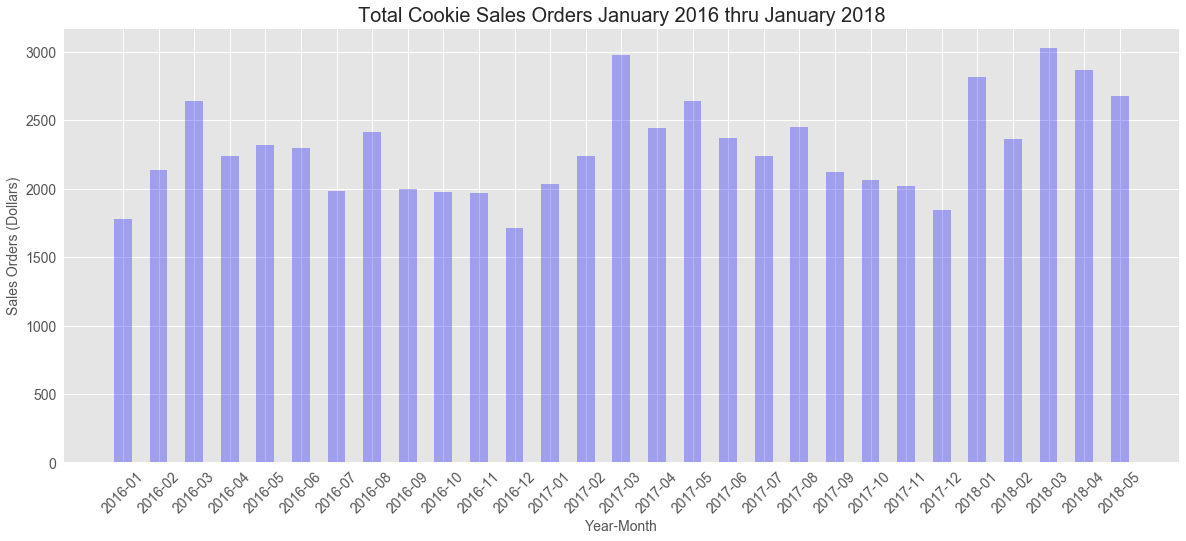

In [49]:
plt.style.use('ggplot')
Combined.plot(kind = 'bar',figsize=(20,8), alpha = .3, color = 'blue', rot = 45, fontsize=14)
#plt.xlim(0,40)
#plt.ylim(750000, 2000000)
#lgnd = plt.legend(['Sales'], loc='best')
#for handle in lgnd.legendHandles:
#    handle.set_sizes([75.0])
#plt.set_title('Average State Rain')
plt.ylabel('Sales Orders (Dollars)',fontsize = 14)
plt.xlabel('Year-Month',fontsize = 14)
plt.title('Total Cookie Sales Orders January 2016 thru January 2018',fontsize = 20)
plt.autoscale(tight=False)
plt.legend().set_visible(False)

plt.show()

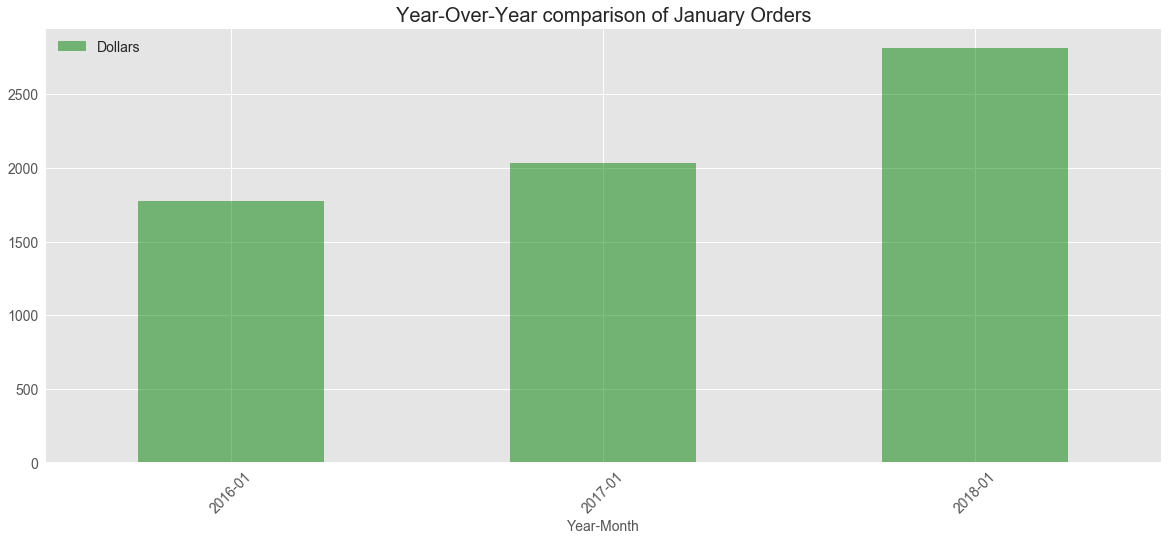

In [50]:
Jans = ['2015-01','2016-01','2017-01','2018-01']

Januarys = Combined[Combined.index.isin(Jans)]
#Januarys.head()

Januarys.plot(kind = 'bar',figsize=(20,8), color = 'green',alpha=0.5, rot=45,fontsize = 14)
#plt.xlim(0,40)
#plt.ylim(0, 2000000)
plt.xlabel('Year-Month',fontsize = 14)
#lgnd = plt.legend(['Sales'], loc='best')
#for handle in lgnd.legendHandles:
#    handle.set_sizes([75.0])
plt.legend(fontsize=14)
plt.title('Year-Over-Year comparison of January Orders',fontsize = 20)
plt.show()

In [51]:
Januarys

,Dollars
YearMonth,
2016-01,1776.852
2017-01,2030.602
2018-01,2813.018


In [52]:
CA = ['CA']
FL = ['FL']
TX = ['TX']
States  = ['CA','TX','FL']

CA1 = FinalAll[FinalAll.SHIP_TO_STATE.isin(CA)]
FL1 = FinalAll[FinalAll.SHIP_TO_STATE.isin(FL)]
TX1 = FinalAll[FinalAll.SHIP_TO_STATE.isin(TX)]

#CAFLTX = FinalAll[FinalAll['SHIP_TO_STATE'] == 'Urban']
Other1 = FinalAll[~FinalAll.SHIP_TO_STATE.isin(States)]
#rural1 = All[All['type'] == 'Rural']
#Other1.info()
#Fore1.to_csv('Fore2',encoding='utf-8')
#CA1Combined


In [53]:
print(plt.style.available)
#Other1groupedYears

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


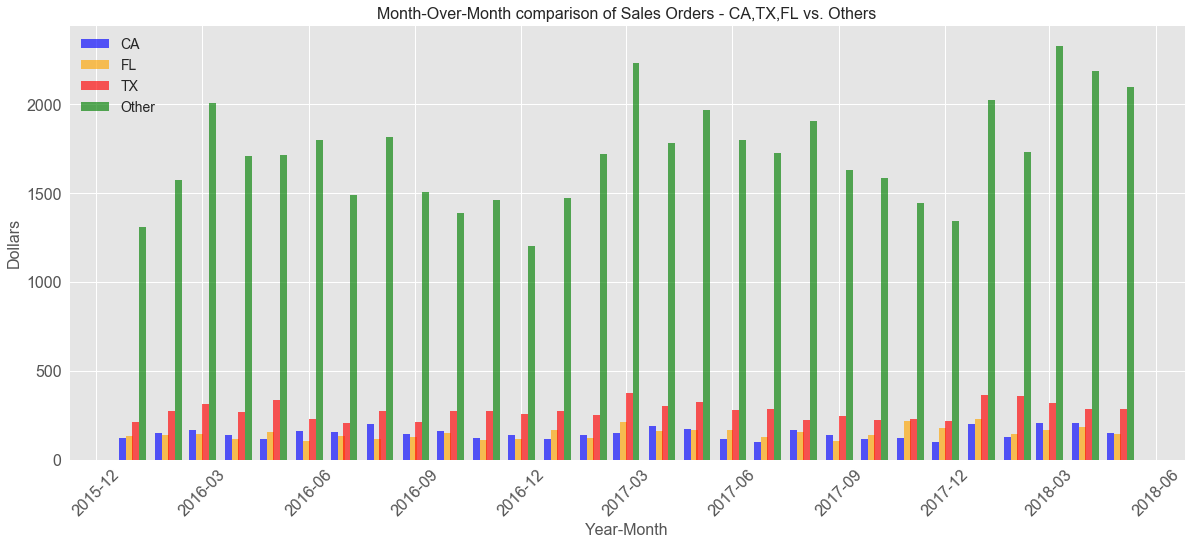

In [54]:
CA1groupedYears = pd.DataFrame(CA1.groupby(['YearMonth'])['LINETOTAL'].agg('sum')).reset_index()
CA1groupedYears['YearMonth'] = CA1groupedYears['YearMonth'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%'))

CA1Combined = CA1groupedYears[['YearMonth','LINETOTAL']]
CA1Combined = CA1Combined.rename(columns={'LINETOTAL': 'Dollars'})

FL1groupedYears = pd.DataFrame(FL1.groupby(['YearMonth'])['LINETOTAL'].agg('sum')).reset_index()
FL1groupedYears['YearMonth'] = FL1groupedYears['YearMonth'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%'))

FL1Combined = FL1groupedYears[['YearMonth','LINETOTAL']]
FL1Combined = FL1Combined.rename(columns={'LINETOTAL': 'Dollars'})

TX1groupedYears = pd.DataFrame(TX1.groupby(['YearMonth'])['LINETOTAL'].agg('sum')).reset_index()
TX1groupedYears['YearMonth'] = TX1groupedYears['YearMonth'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%'))

TX1Combined = TX1groupedYears[['YearMonth','LINETOTAL']]
TX1Combined = TX1Combined.rename(columns={'LINETOTAL': 'Dollars'})

Other1groupedYears = pd.DataFrame(Other1.groupby(['YearMonth'])['LINETOTAL'].agg('sum')).reset_index()
Other1groupedYears['YearMonth'] = Other1groupedYears['YearMonth'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%'))

Other1Combined = Other1groupedYears[['YearMonth','LINETOTAL']]
Other1Combined = Other1Combined.rename(columns={'LINETOTAL': 'Dollars'})

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20,8))
w = 6
rects1 = ax.bar(CA1Combined['YearMonth'] + pd.to_timedelta(w - 17,unit='d'), CA1Combined['Dollars'],width=w,color='blue',align='edge', alpha=.65)
rects2 = ax.bar(FL1Combined['YearMonth'] + pd.to_timedelta(w - 11,unit='d'), FL1Combined['Dollars'],width=w,color='orange',align='edge', alpha=.65)
rects3 = ax.bar(TX1Combined['YearMonth'] + pd.to_timedelta(w - 6,unit='d'), TX1Combined['Dollars'],width=w,color='red',align='edge', alpha=.65)
rects4 = ax.bar(Other1Combined['YearMonth'] + pd.to_timedelta(w + 0,unit='d'), Other1Combined['Dollars'],width=w,color='green',align='edge', alpha=.65)
ax.set_ylabel('Dollars')
ax.set_xlabel('Year-Month')
ax.set_title('Month-Over-Month comparison of Sales Orders - CA,TX,FL vs. Others',fontsize = 24)
ax.legend((rects1[0], rects2[0],rects3[0] ,rects4[0]), ('CA','FL','TX', 'Other'),fontsize = 14)
ax.xaxis_date()
ax.autoscale(tight=False)
locs, labels = plt.xticks()
plt.setp(labels,rotation=45)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)
plt.xticks()
#ax.set_xticklabels('test')
#plt.grid()
plt.show()



In [55]:
CA1Combined.head()

,YearMonth,Dollars
0,2016-01-01,122.368
1,2016-02-01,148.234
2,2016-03-01,169.469
3,2016-04-01,139.951
4,2016-05-01,114.557


In [56]:
#labels = 'California', 'Florida', 'Texas', 'Other'
FinalDollars = pd.DataFrame(FinalAll.groupby('SHIP_TO_STATE')['LINETOTAL'].sum()).reset_index()
CA = ['CA']
FL = ['FL']
TX = ['TX']
States  = ['CA','FL','TX']

CA1 = FinalDollars[FinalDollars.SHIP_TO_STATE.isin(CA)]
FL1 = FinalDollars[FinalDollars.SHIP_TO_STATE.isin(FL)]
TX1 = FinalDollars[FinalDollars.SHIP_TO_STATE.isin(TX)]

#CAFLTX = FinalAll[FinalAll['SHIP_TO_STATE'] == 'Urban']
Other1 = FinalDollars[~FinalDollars.SHIP_TO_STATE.isin(States)]
Other1['LINETOTAL'] = Other1['LINETOTAL'].sum()
Other2 = Other1[2:3]

NewDollars = CA1.append(FL1, ignore_index=True)
NewDollars = NewDollars.append(TX1, ignore_index=True)
#NewDollars = NewDollars.append(Other1, ignore_index=True)
#NewDollars
Other2['SHIP_TO_STATE'] = 'Other'
Other2.head()
NewDollars = NewDollars.append(Other2, ignore_index=True)
NewDollars




C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,SHIP_TO_STATE,LINETOTAL
0,CA,4305.951
1,FL,4365.767
2,TX,7994.030
3,Other,46296.550


In [57]:
YearMonth2016 = ['2016-09','2016-10','2016-11','2016-12','2017-01']
FinalAll2016 = FinalAll[FinalAll.YearMonth.isin(YearMonth2016)]
FinalDollars2016 = pd.DataFrame(FinalAll2016.groupby('SHIP_TO_STATE')['LINETOTAL'].sum()).reset_index()
CA = ['CA']
FL = ['FL']
TX = ['TX']
States  = ['CA','FL','TX']


CA2016 = FinalDollars2016[FinalDollars2016.SHIP_TO_STATE.isin(CA)]
FL2016 = FinalDollars2016[FinalDollars2016.SHIP_TO_STATE.isin(FL)]
TX2016 = FinalDollars2016[FinalDollars2016.SHIP_TO_STATE.isin(TX)]

#CAFLTX = FinalAll[FinalAll['SHIP_TO_STATE'] == 'Urban']
Other12016 = FinalDollars2016[~FinalDollars2016.SHIP_TO_STATE.isin(States)]
Other12016['LINETOTAL'] = Other12016['LINETOTAL'].sum()
Other22016 = Other12016[2:3]

NewDollars2016 = CA2016.append(FL2016, ignore_index=True)
NewDollars2016 = NewDollars2016.append(TX2016, ignore_index=True)
#NewDollars = NewDollars.append(Other1, ignore_index=True)
#NewDollars
Other22016['SHIP_TO_STATE'] = 'Other'
Other2.head()
NewDollars2016 = NewDollars2016.append(Other22016, ignore_index=True)
NewDollars2016

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,SHIP_TO_STATE,LINETOTAL
0,CA,685.050
1,FL,672.587
2,TX,1291.483
3,Other,6495.506


In [58]:
YearMonth2017 = ['2017-09','2017-10','2017-11','2017-12','2018-01']
FinalAll2017 = FinalAll[FinalAll.YearMonth.isin(YearMonth2017)]
FinalDollars2017 = pd.DataFrame(FinalAll2017.groupby('SHIP_TO_STATE')['LINETOTAL'].sum()).reset_index()
CA = ['CA']
FL = ['FL']
TX = ['TX']
States  = ['CA','FL','TX']


CA2017 = FinalDollars2017[FinalDollars2017.SHIP_TO_STATE.isin(CA)]
FL2017 = FinalDollars2017[FinalDollars2017.SHIP_TO_STATE.isin(FL)]
TX2017 = FinalDollars2017[FinalDollars2017.SHIP_TO_STATE.isin(TX)]

#CAFLTX = FinalAll[FinalAll['SHIP_TO_STATE'] == 'Urban']
Other12017 = FinalDollars2017[~FinalDollars2017.SHIP_TO_STATE.isin(States)]
Other12017['LINETOTAL'] = Other12017['LINETOTAL'].sum()
Other22017 = Other12017[2:3]

NewDollars2017 = CA2017.append(FL2017, ignore_index=True)
NewDollars2017 = NewDollars2017.append(TX2017, ignore_index=True)
#NewDollars = NewDollars.append(Other1, ignore_index=True)
#NewDollars
Other22017['SHIP_TO_STATE'] = 'Other'
Other2.head()
NewDollars2017 = NewDollars2017.append(Other22017, ignore_index=True)
NewDollars2017

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,SHIP_TO_STATE,LINETOTAL
0,CA,676.127
1,FL,871.922
2,TX,1279.417
3,Other,7273.717


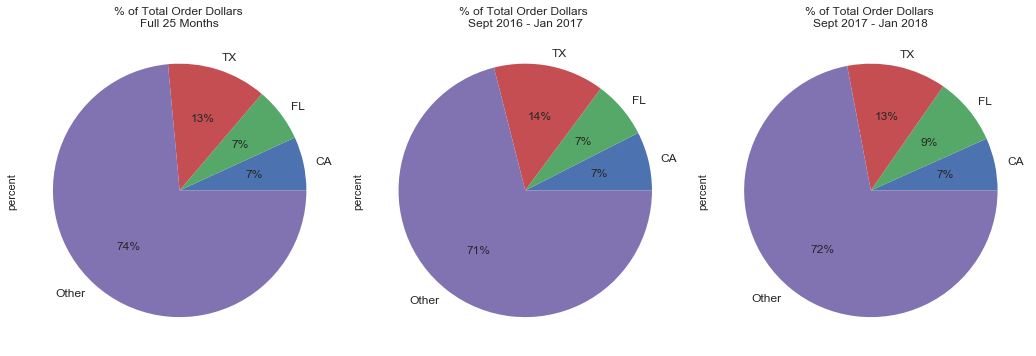

In [59]:
labels = 'CA', 'FL', 'TX', 'Other'
NewDollars['total'] = sum(NewDollars['LINETOTAL'])
NewDollars['percent'] = NewDollars['LINETOTAL'] / NewDollars['total']

NewDollars2016['total'] = sum(NewDollars2016['LINETOTAL'])
NewDollars2016['percent'] = NewDollars2016['LINETOTAL'] / NewDollars2016['total']
#NewDollars
NewDollars2017['total'] = sum(NewDollars2017['LINETOTAL'])
NewDollars2017['percent'] = NewDollars2017['LINETOTAL'] / NewDollars2017['total']

plt.style.use('seaborn')
fig = plt.figure()

pie_chart1 = fig.add_axes([.1, .1, .8, .8], aspect=1)
pie_chart1 = NewDollars['percent'].plot(kind='pie', autopct='%1.f%%', labels=labels,title ='% of Total Order Dollars \nFull 25 Months',fontsize = 12)

pie_chart2 = fig.add_axes([.7, .1, .8, .8], aspect=1)
pie_chart2 = NewDollars2016['percent'].plot(kind='pie', autopct='%1.f%%', labels=labels,title ='% of Total Order Dollars \nSept 2016 - Jan 2017',fontsize = 12)

pie_chart3 = fig.add_axes([1.3, .1, .8, .8], aspect=1)
pie_chart3 = NewDollars2017['percent'].plot(kind='pie', autopct='%1.f%%', labels=labels,title ='% of Total Order Dollars \nSept 2017 - Jan 2018',fontsize = 12)

plt.show()

In [60]:
FinalDollars = pd.DataFrame(FinalAll.groupby('SHIP_TO_STATE')['LINETOTAL'].sum()).reset_index()
CA = ['GA']
FL = ['NC']
TX = ['SC']
States  = ['GA','NC','SC']

CA1 = FinalDollars[FinalDollars.SHIP_TO_STATE.isin(CA)]
FL1 = FinalDollars[FinalDollars.SHIP_TO_STATE.isin(FL)]
TX1 = FinalDollars[FinalDollars.SHIP_TO_STATE.isin(TX)]

#CAFLTX = FinalAll[FinalAll['SHIP_TO_STATE'] == 'Urban']
Other1 = FinalDollars[~FinalDollars.SHIP_TO_STATE.isin(States)]
Other1['LINETOTAL'] = Other1['LINETOTAL'].sum()
Other2 = Other1[2:3]

NewDollars = CA1.append(FL1, ignore_index=True)
NewDollars = NewDollars.append(TX1, ignore_index=True)
#NewDollars = NewDollars.append(Other1, ignore_index=True)
#NewDollars
Other2['SHIP_TO_STATE'] = 'Other'
Other2.head()
NewDollars = NewDollars.append(Other2, ignore_index=True)
NewDollars


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,SHIP_TO_STATE,LINETOTAL
0,GA,1830.124
1,NC,1880.047
2,SC,1143.184
3,Other,58108.943


In [61]:
YearMonth2016 = ['2016-09','2016-10','2016-11','2016-12','2017-01']
FinalAll2016 = FinalAll[FinalAll.YearMonth.isin(YearMonth2016)]
FinalDollars2016 = pd.DataFrame(FinalAll2016.groupby('SHIP_TO_STATE')['LINETOTAL'].sum()).reset_index()
CA = ['GA']
FL = ['NC']
TX = ['SC']
States  = ['GA','NC','SC']

CA2016 = FinalDollars2016[FinalDollars2016.SHIP_TO_STATE.isin(CA)]
FL2016 = FinalDollars2016[FinalDollars2016.SHIP_TO_STATE.isin(FL)]
TX2016 = FinalDollars2016[FinalDollars2016.SHIP_TO_STATE.isin(TX)]

#CAFLTX = FinalAll[FinalAll['SHIP_TO_STATE'] == 'Urban']
Other12016 = FinalDollars2016[~FinalDollars2016.SHIP_TO_STATE.isin(States)]
Other12016['LINETOTAL'] = Other12016['LINETOTAL'].sum()
Other22016 = Other12016[2:3]

NewDollars2016 = CA2016.append(FL2016, ignore_index=True)
NewDollars2016 = NewDollars2016.append(TX2016, ignore_index=True)
#NewDollars = NewDollars.append(Other1, ignore_index=True)
#NewDollars
Other22016['SHIP_TO_STATE'] = 'Other'
Other2.head()
NewDollars2016 = NewDollars2016.append(Other22016, ignore_index=True)
NewDollars2016

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,SHIP_TO_STATE,LINETOTAL
0,GA,257.141
1,NC,261.858
2,SC,140.816
3,Other,8484.809


In [62]:
YearMonth2017 = ['2017-09','2017-10','2017-11','2017-12','2018-01']
FinalAll2017 = FinalAll[FinalAll.YearMonth.isin(YearMonth2017)]
FinalDollars2017 = pd.DataFrame(FinalAll2017.groupby('SHIP_TO_STATE')['LINETOTAL'].sum()).reset_index()
CA = ['GA']
FL = ['NC']
TX = ['SC']
States  = ['GA','NC','SC']


CA2017 = FinalDollars2017[FinalDollars2017.SHIP_TO_STATE.isin(CA)]
FL2017 = FinalDollars2017[FinalDollars2017.SHIP_TO_STATE.isin(FL)]
TX2017 = FinalDollars2017[FinalDollars2017.SHIP_TO_STATE.isin(TX)]

#CAFLTX = FinalAll[FinalAll['SHIP_TO_STATE'] == 'Urban']
Other12017 = FinalDollars2017[~FinalDollars2017.SHIP_TO_STATE.isin(States)]
Other12017['LINETOTAL'] = Other12017['LINETOTAL'].sum()
Other22017 = Other12017[2:3]

NewDollars2017 = CA2017.append(FL2017, ignore_index=True)
NewDollars2017 = NewDollars2017.append(TX2017, ignore_index=True)
#NewDollars = NewDollars.append(Other1, ignore_index=True)
#NewDollars
Other22017['SHIP_TO_STATE'] = 'Other'
Other2.head()
NewDollars2017 = NewDollars2017.append(Other22017, ignore_index=True)
NewDollars2017

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,SHIP_TO_STATE,LINETOTAL
0,GA,295.486
1,NC,300.614
2,SC,243.234
3,Other,9261.848


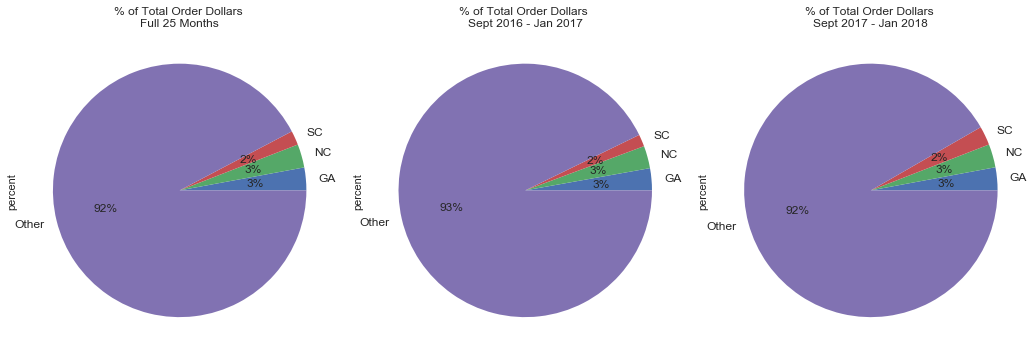

In [63]:
labels = 'GA', 'NC', 'SC', 'Other'
NewDollars['total'] = sum(NewDollars['LINETOTAL'])
NewDollars['percent'] = NewDollars['LINETOTAL'] / NewDollars['total']

NewDollars2016['total'] = sum(NewDollars2016['LINETOTAL'])
NewDollars2016['percent'] = NewDollars2016['LINETOTAL'] / NewDollars2016['total']
#NewDollars
NewDollars2017['total'] = sum(NewDollars2017['LINETOTAL'])
NewDollars2017['percent'] = NewDollars2017['LINETOTAL'] / NewDollars2017['total']

plt.style.use('seaborn')
fig = plt.figure()

pie_chart1 = fig.add_axes([.1, .1, .8, .8], aspect=1)
pie_chart1 = NewDollars['percent'].plot(kind='pie', autopct='%1.f%%', labels=labels,title ='% of Total Order Dollars \nFull 25 Months', fontsize = 12)

pie_chart2 = fig.add_axes([.7, .1, .8, .8], aspect=1)
pie_chart2 = NewDollars2016['percent'].plot(kind='pie', autopct='%1.f%%', labels=labels,title ='% of Total Order Dollars \nSept 2016 - Jan 2017',fontsize = 12)

pie_chart3 = fig.add_axes([1.3, .1, .8, .8], aspect=1)
pie_chart3 = NewDollars2017['percent'].plot(kind='pie', autopct='%1.f%%', labels=labels,title ='% of Total Order Dollars \nSept 2017 - Jan 2018',fontsize = 12)

plt.show()

In [77]:
Fore1 = pd.read_csv("Pres1.csv",encoding = "ISO-8859-1")
Fore1 = Fore1.rename(columns={'LINETOTAL': 'Dollars'})
#Fore.set_index('YearMonth', inplace=True)
Fore1['YearMonth'] = Fore1['YearMonth'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%'))
#CombinedFore = Combined.append(Fore)
#CombinedFore.set_index('YearMonth', inplace=True)
#Fore1 = Fore1[4:]

Final1 = pd.DataFrame(FinalAll.groupby(['YearMonth'])['LINETOTAL'].agg('sum')).reset_index()
Final1['YearMonth'] = Final1['YearMonth'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%'))

Final1 = Final1[['YearMonth','LINETOTAL']]
Final1 = Final1.rename(columns={'LINETOTAL': 'Dollars'})
#Final1

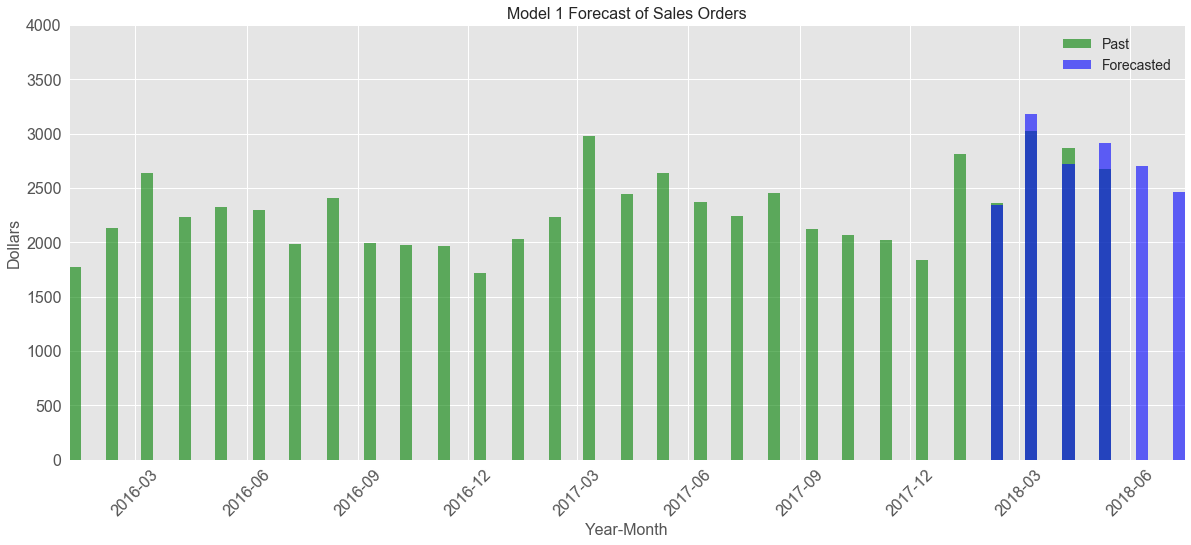

In [78]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20,8))
w =10
rects1 = plt.bar(Final1['YearMonth']+ pd.to_timedelta(w,unit='d'), Final1['Dollars'], color = 'green',width=w, alpha = .6)
rects2 = plt.bar(Fore1['YearMonth']+ pd.to_timedelta(w,unit='d'), Fore1['Dollars'], color = 'blue',width=w, alpha = .6)
ax.set_ylabel('Dollars')
ax.set_xlabel('Year-Month')
ax.set_title('Model 1 Forecast of Sales Orders')
ax.legend((rects1[0], rects2[0]), ('Past','Forecasted'),fontsize = 14)
ax.xaxis_date()
ax.autoscale(tight=True)
locs, labels = plt.xticks()
plt.setp(labels,rotation=45)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)
plt.ylim(0, 4000)
plt.show()


print(plt.style.available)

In [74]:
Fore2 = pd.read_csv("Pres2.csv",encoding = "ISO-8859-1")
Fore2 = Fore2.rename(columns={'LINETOTAL': 'Dollars'})
#Fore.set_index('YearMonth', inplace=True)
Fore2['YearMonth'] = Fore2['YearMonth'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%'))
#Fore2 = Fore2[4:]
#Fore1
Final2 = pd.DataFrame(FinalAll.groupby(['YearMonth'])['LINETOTAL'].agg('sum')).reset_index()
#Final2 = Final2[:-1]
Final2['YearMonth'] = Final2['YearMonth'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%'))

Final2 = Final2[['YearMonth','LINETOTAL']]
Final2 = Final2.rename(columns={'LINETOTAL': 'Dollars'})
#Final1

In [75]:

Fore2

,YearMonth,Dollars
0,2018-02-01,1725.769
1,2018-03-01,1950.228
2,2018-04-01,2560.955
3,2018-05-01,2185.014
4,2018-06-01,2257.214
5,2018-07-01,2081.211


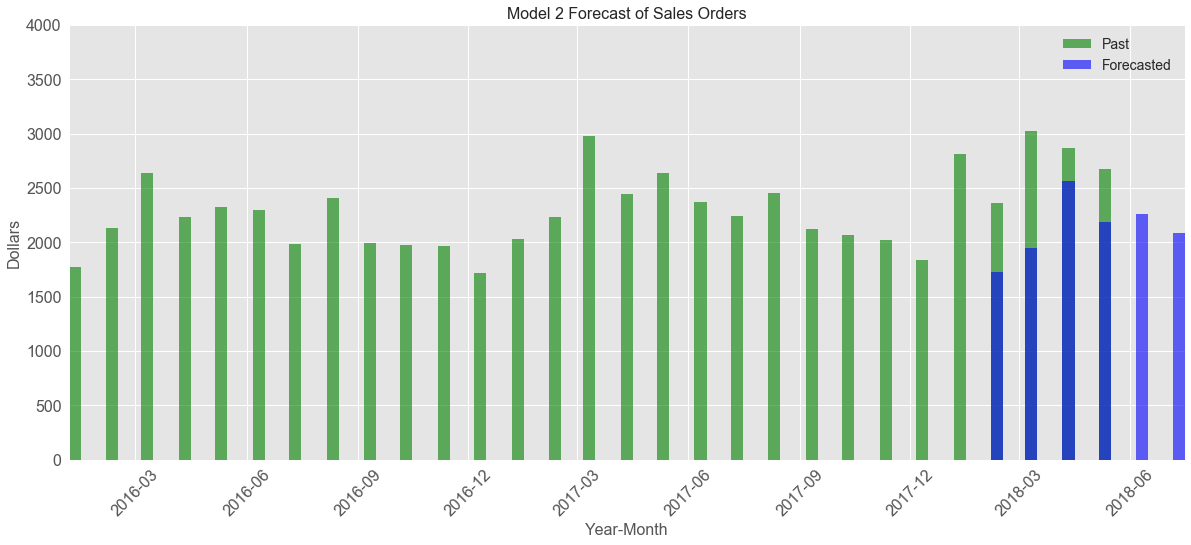

In [76]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20,8))
w =10
rects1 = plt.bar(Final1['YearMonth']+ pd.to_timedelta(w,unit='d'), Final1['Dollars'], color = 'green',width=w, alpha = .6)
rects2 = plt.bar(Fore2['YearMonth']+ pd.to_timedelta(w,unit='d'), Fore2['Dollars'], color = 'blue',width=w, alpha = .6)
ax.set_ylabel('Dollars')
ax.set_xlabel('Year-Month')
ax.set_title('Model 2 Forecast of Sales Orders')
ax.legend((rects1[0], rects2[0]), ('Past','Forecasted'),fontsize = 14)
ax.xaxis_date()
ax.autoscale(tight=True)
locs, labels = plt.xticks()
plt.setp(labels,rotation=45)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)
plt.ylim(0, 4000)
plt.show()
